In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/', download=True)

c:\users\davood\appdata\local\programs\python\python39\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x1C057675A60>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

TypeError: Invalid shape (1, 28, 28) for image data

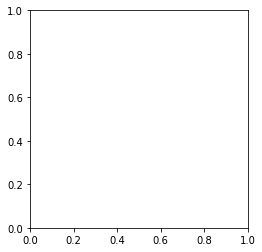

In [55]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


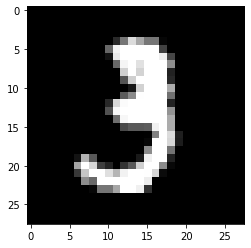

In [54]:
image, label = dataset[10]
plt.imshow(image[0], cmap='gray')
print('Label:', label)

In [9]:
import torchvision.transforms as transforms

In [10]:
# MNIST dataset(Images and Labels)
dataset = MNIST(root='data/', train=True,
                transform=transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


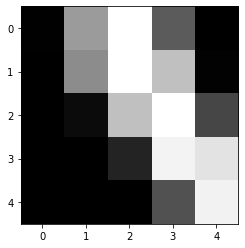

In [13]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray');

In [14]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [15]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [16]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic Regression Model
model = nn.Linear(input_size, num_classes)

In [17]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0064, -0.0111,  0.0189,  ...,  0.0213,  0.0046,  0.0353],
        [ 0.0080,  0.0183, -0.0193,  ..., -0.0321,  0.0280,  0.0214],
        [-0.0331, -0.0113, -0.0152,  ..., -0.0138,  0.0259, -0.0276],
        ...,
        [-0.0120, -0.0220, -0.0177,  ..., -0.0119,  0.0299,  0.0180],
        [ 0.0320, -0.0235, -0.0101,  ..., -0.0190, -0.0197, -0.0199],
        [ 0.0257,  0.0128, -0.0112,  ..., -0.0212,  0.0132, -0.0233]],
       requires_grad=True)

In [18]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0140,  0.0228, -0.0174, -0.0188,  0.0285,  0.0098,  0.0071,  0.0223,
        -0.0040, -0.0310], requires_grad=True)

In [19]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([2, 5, 0, 4, 7, 6, 4, 1, 3, 2, 5, 5, 5, 7, 9, 7, 9, 6, 8, 1, 2, 0, 8, 8,
        8, 7, 0, 3, 8, 8, 5, 2, 3, 4, 8, 5, 1, 3, 6, 3, 1, 5, 9, 8, 1, 3, 7, 6,
        4, 6, 6, 3, 4, 4, 9, 8, 8, 0, 5, 8, 3, 8, 0, 9, 9, 5, 6, 7, 0, 3, 6, 3,
        4, 6, 1, 0, 2, 0, 1, 1, 0, 5, 1, 1, 2, 1, 0, 8, 6, 3, 1, 3, 4, 8, 1, 9,
        9, 4, 5, 3, 9, 4, 6, 4, 9, 3, 6, 6, 9, 4, 6, 8, 9, 2, 0, 2, 0, 1, 7, 3,
        2, 6, 7, 3, 3, 9, 3, 3])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [20]:
class Person:
    # Class Constructor
    def __init__(self, name, age):
        # Object Properties
        self.name = name
        self.age = age
    
    # Method
    def say_hello(self):
        print("Hello my name is " + self.name + "!")
        

In [21]:
bob = Person("bob", 35)
bob.say_hello()

Hello my name is bob!


In [22]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [23]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [24]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0015, -0.0009,  0.0133,  ...,  0.0332, -0.0266,  0.0088],
         [ 0.0226,  0.0072,  0.0150,  ..., -0.0023,  0.0148,  0.0262],
         [-0.0335,  0.0264,  0.0189,  ...,  0.0220,  0.0163, -0.0282],
         ...,
         [-0.0344, -0.0113, -0.0278,  ...,  0.0148, -0.0121, -0.0354],
         [ 0.0056, -0.0144, -0.0143,  ..., -0.0206,  0.0051,  0.0137],
         [ 0.0141,  0.0088, -0.0135,  ..., -0.0052,  0.0126, -0.0265]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0136, -0.0235, -0.0305,  0.0148, -0.0356, -0.0336,  0.0031, -0.0291,
         -0.0251, -0.0297], requires_grad=True)]

In [25]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break
    
print('outputs.shape: ', outputs.shape)
print('sample outputs: \n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape:  torch.Size([128, 10])
sample outputs: 
 tensor([[ 0.1402,  0.2471, -0.0042,  0.2427, -0.0252, -0.1940,  0.1526, -0.0576,
          0.0867,  0.1731],
        [ 0.3200,  0.0937,  0.1743, -0.0694, -0.1315, -0.2317,  0.0553,  0.0164,
         -0.1273,  0.2844]])


In [26]:
import torch.nn.functional as F

In [27]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("sample probability: \n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

sample probability: 
 tensor([[0.1057, 0.1176, 0.0915, 0.1171, 0.0896, 0.0756, 0.1070, 0.0867, 0.1002,
         0.1092],
        [0.1305, 0.1041, 0.1128, 0.0884, 0.0831, 0.0752, 0.1002, 0.0963, 0.0834,
         0.1259]])
Sum:  1.0


In [28]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([1, 0, 7, 1, 1, 3, 2, 1, 6, 3, 5, 9, 1, 1, 2, 9, 1, 6, 2, 3, 1, 1, 4, 0,
        6, 2, 6, 3, 7, 0, 3, 0, 2, 2, 1, 3, 0, 6, 1, 3, 2, 3, 1, 7, 9, 4, 1, 1,
        4, 9, 2, 9, 4, 0, 7, 1, 1, 6, 9, 1, 1, 1, 3, 1, 4, 3, 1, 3, 1, 1, 2, 1,
        9, 4, 1, 3, 2, 3, 7, 2, 3, 0, 3, 1, 6, 9, 3, 3, 1, 5, 3, 9, 0, 2, 9, 7,
        4, 9, 9, 9, 1, 0, 4, 0, 9, 0, 2, 7, 4, 2, 0, 1, 2, 0, 1, 1, 1, 2, 3, 5,
        9, 2, 6, 0, 3, 0, 0, 2])
tensor([0.1176, 0.1305, 0.1354, 0.1218, 0.1332, 0.1178, 0.1164, 0.1251, 0.1203,
        0.1259, 0.1116, 0.1279, 0.1287, 0.1247, 0.1421, 0.1099, 0.1210, 0.1327,
        0.1258, 0.1223, 0.1279, 0.1384, 0.1296, 0.1132, 0.1195, 0.1215, 0.1299,
        0.1260, 0.1265, 0.1132, 0.1311, 0.1272, 0.1152, 0.1410, 0.1408, 0.1168,
        0.1223, 0.1379, 0.1240, 0.1299, 0.1103, 0.1233, 0.1436, 0.1208, 0.1460,
        0.1266, 0.1290, 0.1199, 0.1246, 0.1259, 0.1209, 0.1245, 0.1338, 0.1290,
        0.1150, 0.1275, 0.1404, 0.1481, 0.1476, 0.1289, 0.1163, 0.1277, 0.1213,
       

In [29]:
labels

tensor([4, 3, 8, 2, 9, 6, 3, 3, 0, 9, 6, 0, 9, 2, 5, 5, 3, 1, 0, 7, 6, 7, 7, 5,
        4, 0, 8, 7, 5, 2, 7, 9, 1, 3, 7, 9, 4, 6, 7, 4, 3, 7, 4, 8, 0, 4, 4, 9,
        3, 9, 5, 3, 9, 1, 3, 1, 4, 8, 6, 9, 8, 1, 7, 7, 3, 9, 6, 9, 6, 8, 5, 2,
        6, 7, 6, 9, 0, 2, 5, 3, 9, 5, 8, 1, 4, 0, 9, 2, 9, 6, 9, 6, 1, 8, 0, 6,
        7, 0, 6, 0, 2, 4, 1, 1, 0, 6, 5, 1, 7, 5, 7, 4, 8, 8, 4, 3, 4, 3, 7, 6,
        0, 3, 5, 4, 5, 3, 2, 0])

In [30]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return(torch.tensor(torch.sum(preds==labels).item()) / len(labels))

In [31]:
accuracy(outputs, labels)

tensor(0.0469)

In [32]:
loss_fn = F.cross_entropy

# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3393, grad_fn=<NllLossBackward>)


In [33]:
"""
for epoch in range(num_epochs):
    # Training Phase
    for batch in train_loader:
        # Generate predictions 
        # Calculate loss
        # Compute gradients
        # update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (Accuracy etc.) 
    # calculate average validation loss & Metrics
    
    # Log epoch, loss & metrics for inspections
    
        """
        

'\nfor epoch in range(num_epochs):\n    # Training Phase\n    for batch in train_loader:\n        # Generate predictions \n        # Calculate loss\n        # Compute gradients\n        # update weights\n        # Reset gradients\n    \n    # Validation phase\n    for batch in val_loader:\n        # Generate predictions\n        # Calculate loss\n        # Calculate metrics (Accuracy etc.) \n    # calculate average validation loss & Metrics\n    \n    # Log epoch, loss & metrics for inspections\n    \n        '

In [34]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
        
    return history

In [35]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [36]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # generate predictions
        loss = F.cross_entropy(out, labels) # calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                  # generate predictions
        loss = F.cross_entropy(out, labels) # calculate loss
        acc = accuracy(out, labels)         # calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean() # combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()    # combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("epoch [{}], val_loss: {:.4}, val_acc: {:.4}".format(epoch, result['val_loss'], result['val_acc']))
        
model = MnistModel()

In [37]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3353946208953857, 'val_acc': 0.0947389230132103}

In [38]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

epoch [0], val_loss: 1.967, val_acc: 0.616
epoch [1], val_loss: 1.694, val_acc: 0.7444
epoch [2], val_loss: 1.489, val_acc: 0.7804
epoch [3], val_loss: 1.333, val_acc: 0.795
epoch [4], val_loss: 1.214, val_acc: 0.8072


In [39]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

epoch [0], val_loss: 1.121, val_acc: 0.8141
epoch [1], val_loss: 1.046, val_acc: 0.8192
epoch [2], val_loss: 0.9844, val_acc: 0.8237
epoch [3], val_loss: 0.9335, val_acc: 0.8275
epoch [4], val_loss: 0.8905, val_acc: 0.8312


In [40]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

epoch [0], val_loss: 0.8537, val_acc: 0.8333
epoch [1], val_loss: 0.8219, val_acc: 0.8376
epoch [2], val_loss: 0.7941, val_acc: 0.8405
epoch [3], val_loss: 0.7696, val_acc: 0.8426
epoch [4], val_loss: 0.7477, val_acc: 0.8447


In [41]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

epoch [0], val_loss: 0.7282, val_acc: 0.8472
epoch [1], val_loss: 0.7106, val_acc: 0.8478
epoch [2], val_loss: 0.6946, val_acc: 0.8503
epoch [3], val_loss: 0.6801, val_acc: 0.8511
epoch [4], val_loss: 0.6667, val_acc: 0.8525


Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

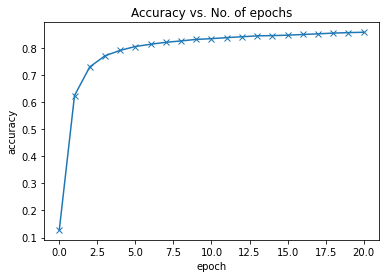

In [101]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

In [43]:
# Define test dataset
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

Shape:  torch.Size([1, 28, 28])
Label:  7


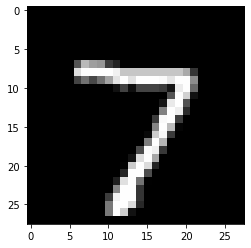

In [52]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape: ', img.shape)
print('Label: ', label)

In [56]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label:  7 , Predicted:  7


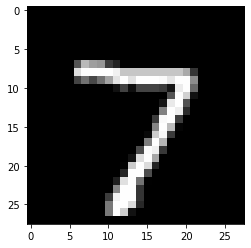

In [57]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ', Predicted: ', predict_image(img, model))

Label:  0 , Predicted:  0


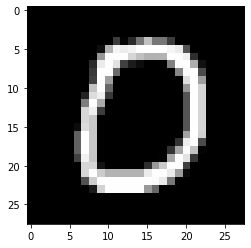

In [58]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ', Predicted: ', predict_image(img, model))

Label:  9 , Predicted:  9


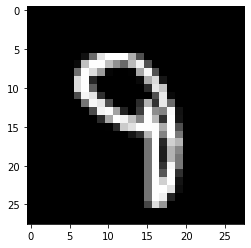

In [59]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ', Predicted: ', predict_image(img, model))

Label:  2 , Predicted:  8


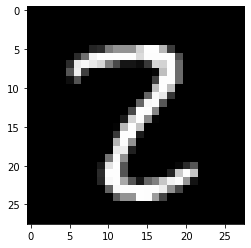

In [60]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ', Predicted: ', predict_image(img, model))

In [62]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6400378942489624, 'val_acc': 0.8628906011581421}

In [63]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [64]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))

<All keys matched successfully>

In [65]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6400378942489624, 'val_acc': 0.8628906011581421}